<a href="https://colab.research.google.com/github/AlexanderSilvaB/googlecolab/blob/master/Fashion%20MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load data

In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Store class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

1.14.0


# Prepare data

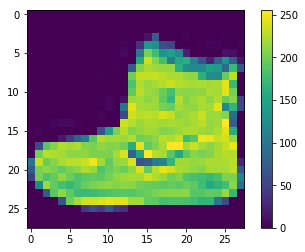

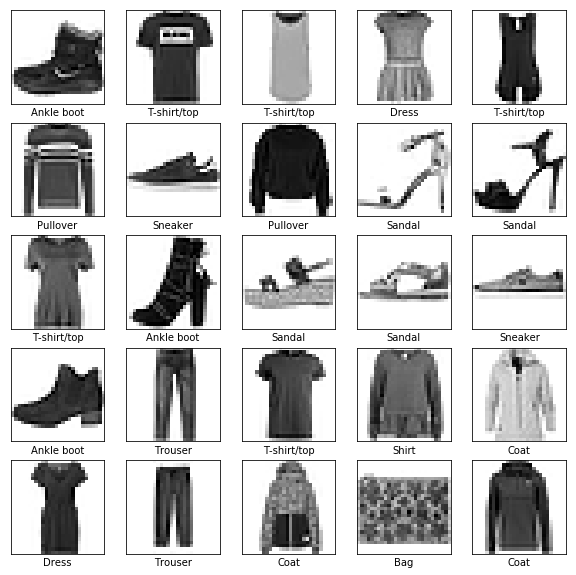

In [12]:
# Visualize first
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


# Scale values
train_images = train_images / 255.0
test_images = test_images / 255.0

# Visualize first 25 scaled images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Buil the model

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.4987 - acc: 0.8245
Epoch 2/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3804 - acc: 0.8638
Epoch 3/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3387 - acc: 0.8773
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3141 - acc: 0.8865
Epoch 5/10
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2946 - acc: 0.8911
Epoch 6/10
60000/60000 [==============================] - 4s 64us/sample - loss: 0.2802 - acc: 0.8969
Epoch 7/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2686 - acc: 0.9008
Epoch 8/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2572 - acc: 0.9044
Epoch 9/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2482 - acc: 0.9069
Epoch 10/10
60000/60000 [==============================] - 4s 67us/sample - loss: 

# Evaluate

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.3506 - acc: 0.8751

Test accuracy: 0.8751


# Make predictions

In [0]:
predictions = model.predict(test_images)

# Plot functions

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Plot predictions

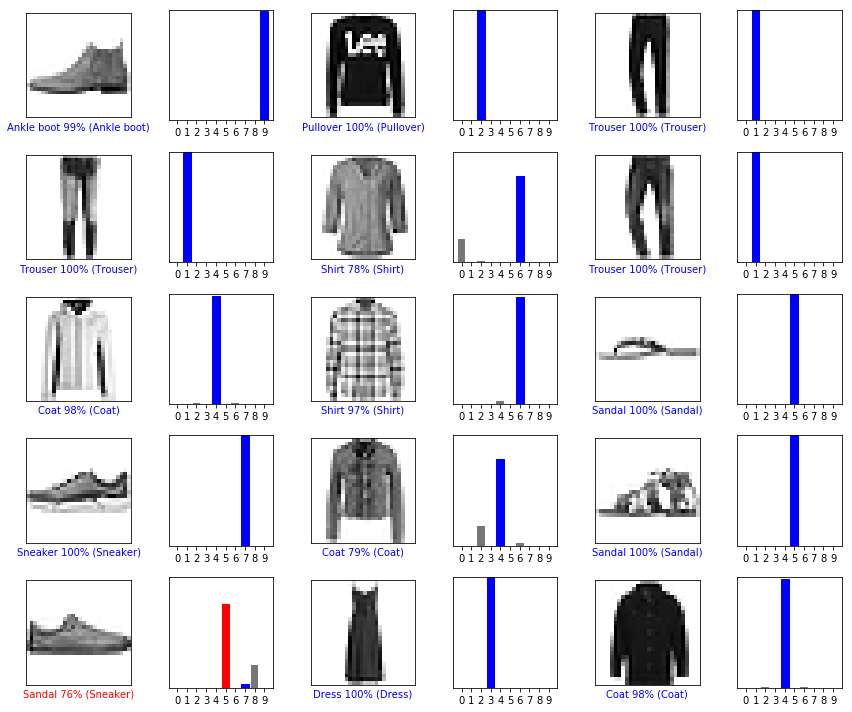

In [22]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Predict single image

(28, 28)
(1, 28, 28)
[[8.8998087e-05 2.5886014e-11 9.9770337e-01 6.2384078e-07 1.4965700e-03
  6.8805284e-10 7.1049551e-04 3.8053650e-22 1.3246461e-09 5.7644013e-17]]


2

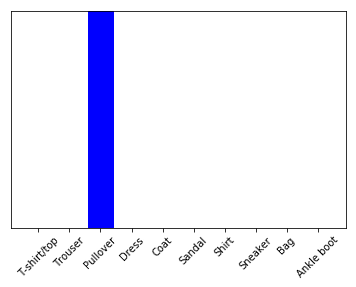

In [23]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

predictions_single = model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])